In [63]:
import pandas as pd
import numpy as np

from sklearn import model_selection, preprocessing, linear_model, metrics

In [98]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [99]:
target = "charges"
X = df.drop(columns=[target]) # Features
y = df[target] # target variable

X = pd.get_dummies(X, drop_first=True) # One hot encoding

# Randomly split the data into training and test test. 
# Keeping 30% of the records in test set.
# random_state creates a reproducible set of random samples 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)

scaler = preprocessing.StandardScaler() # Calculates the value of Z scores for each column
scaler.fit(X_train) # Calculating the mean and std for each column
X_train_std = scaler.transform(X_train) # Calculating the Z scores for each column

X_test_std = scaler.transform(X_test) # Applying the scaler transformation on the test data.
# Note we did not call fit function on test.

estimator = linear_model.LinearRegression()
estimator.fit(X_train_std, y_train) # Calculate the values of the parameters theta0, theta1 ...

y_train_pred = estimator.predict(X_train_std)
y_test_pred = estimator.predict(X_test_std)
r2_test = metrics.r2_score(y_test, y_test_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

print("R2 on test:", r2_test)
print("R2 on train:", r2_train)

print("RMSE on test:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("RMSE on train:", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

R2 on test: 0.7405989316927211
R2 on train: 0.7545557492633161
RMSE on test: 6063.122656850451
RMSE on train: 6039.6018713245385


In [67]:
target = "charges"
X = df.drop(columns=[target]) # Features
y = np.log(df[target]) # target variable

X = pd.get_dummies(X, drop_first=True) # One hot encoding

# Randomly split the data into training and test test. 
# Keeping 30% of the records in test set.
# random_state creates a reproducible set of random samples 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)

scaler = preprocessing.StandardScaler() # Calculates the value of Z scores for each column
scaler.fit(X_train) # Calculating the mean and std for each column
X_train_std = scaler.transform(X_train) # Calculating the Z scores for each column

X_test_std = scaler.transform(X_test) # Applying the scaler transformation on the test data.
# Note we did not call fit function on test.

estimator = linear_model.LinearRegression()
estimator.fit(X_train_std, y_train) # Calculate the values of the parameters theta0, theta1 ...

y_train_pred = estimator.predict(X_train_std)
y_test_pred = estimator.predict(X_test_std)
r2_test = metrics.r2_score(y_test, y_test_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

print("R2 on test:", r2_test)
print("R2 on train:", r2_train)

print("RMSE on test:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("RMSE on train:", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

R2 on test: 0.78742951961976
R2 on train: 0.7589104330619342
RMSE on test: 0.4228608853190619
RMSE on train: 0.4517429024103798


In [52]:
%matplotlib inline

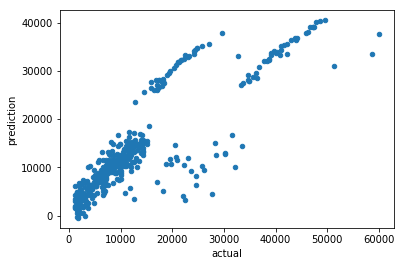

In [55]:
summary = pd.DataFrame({"actual": y_test, "prediction": y_test_pred})
summary["error"] = summary.prediction - summary.actual
summary.plot.scatter(0, 1)

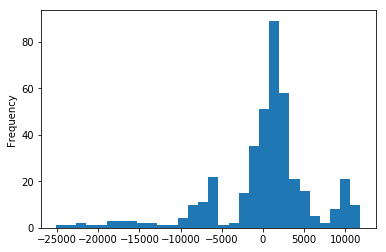

In [56]:
summary.error.plot.hist(bins = 30)

In [58]:
sse = (summary.error ** 2).sum()
sse

14778105453.509335

In [59]:
sst = ((y_test - np.mean(y_train)) ** 2).sum()
sst

56970277938.44924

In [60]:
sse/sst

0.2594002695488974

In [62]:
r2 = 1 - sse/sst
r2

0.7405997304511026

In [44]:
936/len(X)

0.6995515695067265

In [46]:
estimator.coef_, estimator.intercept_

(array([3528.98273114, 1961.65520818,  421.55016415, -141.35911014,
        9733.78688309, -129.54588605, -414.54148288, -379.09534369]),
 13276.698553898505)

In [100]:
pd.DataFrame({"feature": X.columns,"coeffient": estimator.coef_})

,feature,coeffient
0,age,3528.982731
1,bmi,1961.655208
2,children,421.550164
3,gender_male,-141.359110
4,smoker_yes,9733.786883
5,region_northwest,-129.545886
6,region_southeast,-414.541483
7,region_southwest,-379.095344


In [ ]:
y = 13276.698553898505 + 3528.982731 * age + 1961.655208 * bmi + ...

In [39]:
np.random.seed(1)
n = 7
(np.random.random(n) * 10).astype("int")

array([4, 7, 0, 3, 1, 0, 1])

In [68]:
a = np.array([
    [1, 2, 3],
    [0, 1, 0],
    [-1, 0, 1],
    [2, 2, 2]
])
a

array([[ 1,  2,  3],
       [ 0,  1,  0],
       [-1,  0,  1],
       [ 2,  2,  2]])

In [70]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit_transform(a)

array([[ 1.,  2.,  3.,  1.,  2.,  3.,  4.,  6.,  9.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [-1.,  0.,  1.,  1., -0., -1.,  0.,  0.,  1.],
       [ 2.,  2.,  2.,  4.,  4.,  4.,  4.,  4.,  4.]])

In [72]:
a = np.random.random((3, 1000))
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit_transform(a).shape

(3, 501500)

In [79]:
target = "charges"
X = df.drop(columns=[target]) # Features
y = np.log(df[target]) # target variable

X = pd.get_dummies(X, drop_first=True) # One hot encoding

# Randomly split the data into training and test test. 
# Keeping 30% of the records in test set.
# random_state creates a reproducible set of random samples 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)

scaler = preprocessing.StandardScaler() # Calculates the value of Z scores for each column
scaler.fit(X_train) # Calculating the mean and std for each column
X_train_std = scaler.transform(X_train) # Calculating the Z scores for each column

X_test_std = scaler.transform(X_test) # Applying the scaler transformation on the test data.
# Note we did not call fit function on test.

poly = preprocessing.PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly.fit_transform(X_train_std)
X_test_poly = poly.fit_transform(X_test_std)


estimator = linear_model.LinearRegression()
estimator.fit(X_train_poly, y_train) # Calculate the values of the parameters theta0, theta1 ...

y_train_pred = estimator.predict(X_train_poly)
y_test_pred = estimator.predict(X_test_poly)
r2_test = metrics.r2_score(y_test, y_test_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

print("R2 on test:", r2_test)
print("R2 on train:", r2_train)

print("RMSE on test:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("RMSE on train:", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))




R2 on test: 0.8124126133153726
R2 on train: 0.8599709856688836
RMSE on test: 0.39723531788177796
RMSE on train: 0.3442794855355537


In [80]:
from sklearn import pipeline

In [96]:
target = "charges"
X = df.drop(columns=[target]) # Features
y = np.log(df[target]) # target variable

X = pd.get_dummies(X, drop_first=True) # One hot encoding

# Randomly split the data into training and test test. 
# Keeping 30% of the records in test set.
# random_state creates a reproducible set of random samples 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("estimator", linear_model.Lasso(alpha=0.001, max_iter=2000)) 
    # alpha: regularization parameter
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
r2_test = metrics.r2_score(y_test, y_test_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

print("R2 on test:", r2_test)
print("R2 on train:", r2_train)

print("RMSE on test:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("RMSE on train:", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))


R2 on test: 0.7873181182379406
R2 on train: 0.7588912552611219
RMSE on test: 0.42297167473022385
RMSE on train: 0.45176086930797615


In [97]:
est = pipe.steps[-1][-1]
pd.DataFrame({"feature": X.columns, "coefficient": est.coef_})

,feature,coefficient
0,age,0.470612
1,bmi,0.080060
2,children,0.114241
3,gender_male,-0.044276
4,smoker_yes,0.628714
5,region_northwest,-0.020670
6,region_southeast,-0.068498
7,region_southwest,-0.056659
